In [47]:
# Market stock analysis 

# Technology stocks analysis
# What was the daily change in stock price ?

import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')

import pandas_datareader as pdr
from pandas_datareader import data, wb

from datetime import datetime

from __future__ import division



In [48]:
# Set the time: 
end = datetime.now() # time now
start = datetime(end.year-1, end.month, end.day) # a year ago

In [78]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'SPY']
for stock in tech_list:
    globals()[stock] = data.DataReader(stock, "iex", start, end) # store the dataframe into global variable    

In [50]:
# Just a check:
# Yahoo Finance and Google do not support the python datareader API anymore
# This is one way I found how to get the financial data out: https://github.com/pydata/pandas-datareader/issues/587 
df = data.DataReader("AMZN", "iex", start, end)

In [51]:
df

,open,high,low,close,volume
date,,,,,
2017-11-21,1132.86,1140.00,1128.20,1139.49,2479397
2017-11-22,1141.00,1160.27,1141.00,1156.16,3555273
2017-11-24,1160.70,1186.84,1160.70,1186.00,3528011
2017-11-27,1202.66,1213.41,1191.15,1195.83,6744045
2017-11-28,1204.88,1205.34,1188.52,1193.60,4559449
2017-11-29,1194.80,1194.80,1145.19,1161.27,9257512
2017-11-30,1167.10,1178.57,1160.00,1176.75,4509208
2017-12-01,1172.05,1179.65,1152.00,1162.35,4107094
2017-12-04,1173.85,1175.20,1128.00,1133.95,5931915


In [52]:
AAPL.head()

,open,high,low,close,volume
date,,,,,
2017-11-21,168.2539,171.1307,168.2539,170.5790,25131295
2017-11-22,170.7958,172.4115,170.4904,172.3721,25588925
2017-11-24,172.5100,172.9041,172.0626,172.3820,14026673
2017-11-27,172.4608,172.4903,170.7761,171.5150,20716802
2017-11-28,171.7219,172.2834,169.3180,170.5101,26428802


In [53]:
AAPL.describe()

,open,high,low,close,volume
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,187.879856,189.669311,186.194339,187.926239,3.213587e+07
std,20.439939,20.661682,20.152947,20.451470,1.376740e+07
min,152.539900,156.188900,148.621300,152.855100,1.251979e+07
25%,171.038325,172.404250,169.916750,171.079200,2.276852e+07
50%,184.799800,185.936850,183.319450,184.705450,2.872344e+07
75%,206.016150,208.111425,204.867025,206.771050,3.787715e+07
max,229.977600,232.658200,228.981100,231.263100,9.624675e+07


In [54]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 2017-11-21 to 2018-11-20
Data columns (total 5 columns):
open      252 non-null float64
high      252 non-null float64
low       252 non-null float64
close     252 non-null float64
volume    252 non-null int64
dtypes: float64(4), int64(1)
memory usage: 11.8+ KB


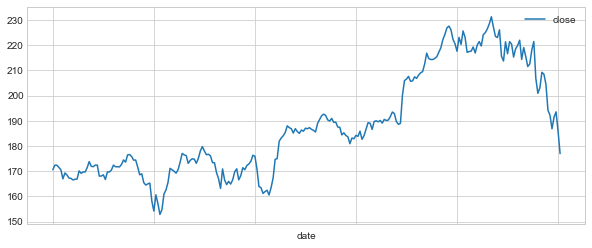

In [55]:

AAPL['close'].plot(legend = True, figsize =(10,4) )

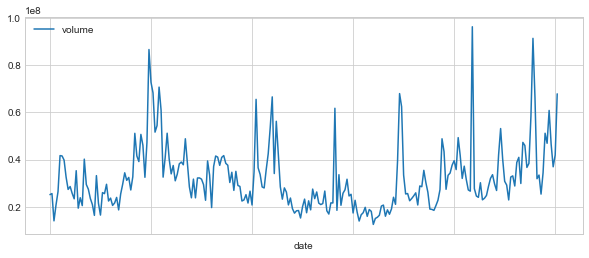

In [56]:
AAPL['volume'].plot(legend = True, figsize = (10,4))

In [57]:
# Check the moving average, which will show some sotck trends:
ma_day = [ 10, 20, 50]
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = AAPL['close'].rolling(ma).mean()
    # AAPL[column_name] = pd.rolling_mean(AAPL['close'], ma) # returns: module 'pandas' has no attribute 'rolling_mean'
    
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 2017-11-21 to 2018-11-20
Data columns (total 8 columns):
open              252 non-null float64
high              252 non-null float64
low               252 non-null float64
close             252 non-null float64
volume            252 non-null int64
MA for 10 days    243 non-null float64
MA for 20 days    233 non-null float64
MA for 50 days    203 non-null float64
dtypes: float64(7), int64(1)
memory usage: 17.7+ KB


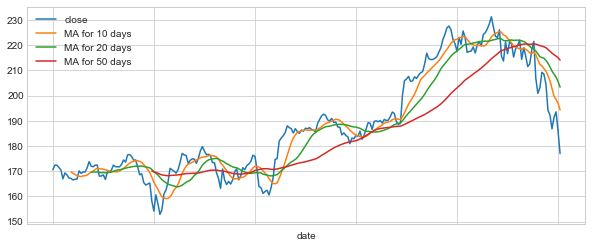

In [58]:
#Lets plot these new columns:
AAPL[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(legend = True, figsize = (10,4))

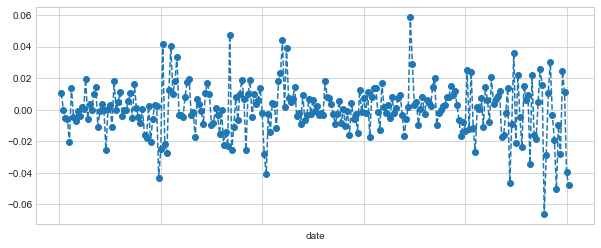

In [59]:
# check the stock daily return: percentage gain/loss on daily basis
AAPL['daily return'] = AAPL['close'].pct_change()
AAPL['daily return'].plot(figsize = [10,4], marker = 'o', linestyle = '--')

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


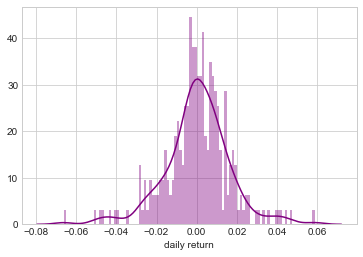

In [61]:
# So waht is the average datareturn -- take a look into histogram:
sns.distplot(AAPL['daily return'].dropna(), bins = 100, color = 'purple')

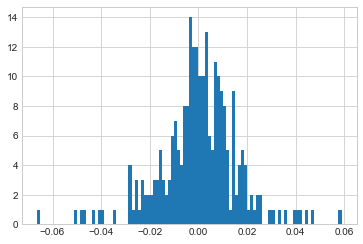

In [62]:
# the other way of ploting the histogram is just by using the hist fn:
AAPL['daily return'].hist(bins = 100)

In [79]:
## Find the return on the stocks: take all tech stocks and only the closing price:
closing_df = data.DataReader(tech_list, "iex", start, end)['close']

In [80]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT,SPY
date,,,,,
2017-11-21,170.5790,1139.49,1034.49,82.2954,255.3424
2017-11-22,172.3721,1156.16,1035.96,81.6958,255.1165
2017-11-24,172.3820,1186.00,1040.61,81.8432,255.7058
2017-11-27,171.5150,1195.83,1054.21,82.4428,255.5781
2017-11-28,170.5101,1193.60,1047.41,83.4356,258.1709


In [81]:
tech_rets = closing_df.pct_change()

In [82]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT,SPY
date,,,,,
2017-11-21,NaN,NaN,NaN,NaN,NaN
2017-11-22,0.010512,0.014629,0.001421,-0.007286,-0.000885
2017-11-24,0.000057,0.025810,0.004489,0.001804,0.002310
2017-11-27,-0.005030,0.008288,0.013069,0.007326,-0.000499
2017-11-28,-0.005859,-0.001865,-0.006450,0.012042,0.010145


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


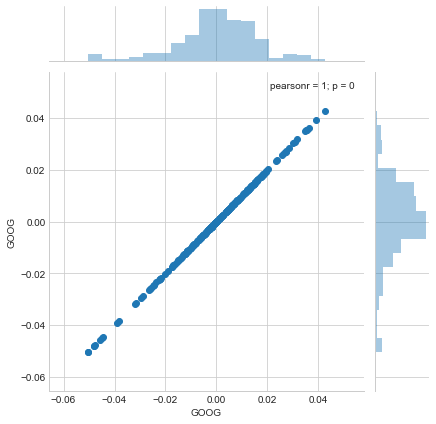

In [83]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind = 'scatter')

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


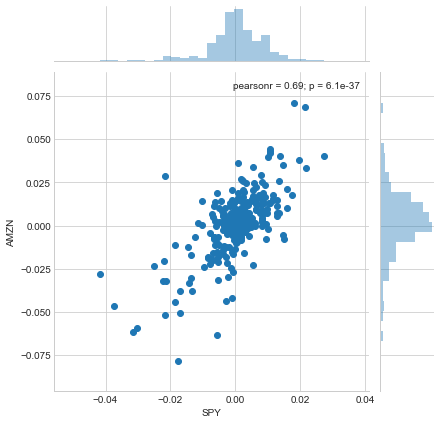

In [85]:
# is there any relationshp btw tech stocks:
sns.jointplot('SPY', 'AMZN', tech_rets, kind = 'scatter')

In [86]:
# Let's compare everybody to everybody (stocks, offf course):
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT,SPY
date,,,,,
2017-11-21,NaN,NaN,NaN,NaN,NaN
2017-11-22,0.010512,0.014629,0.001421,-0.007286,-0.000885
2017-11-24,0.000057,0.025810,0.004489,0.001804,0.002310
2017-11-27,-0.005030,0.008288,0.013069,0.007326,-0.000499
2017-11-28,-0.005859,-0.001865,-0.006450,0.012042,0.010145


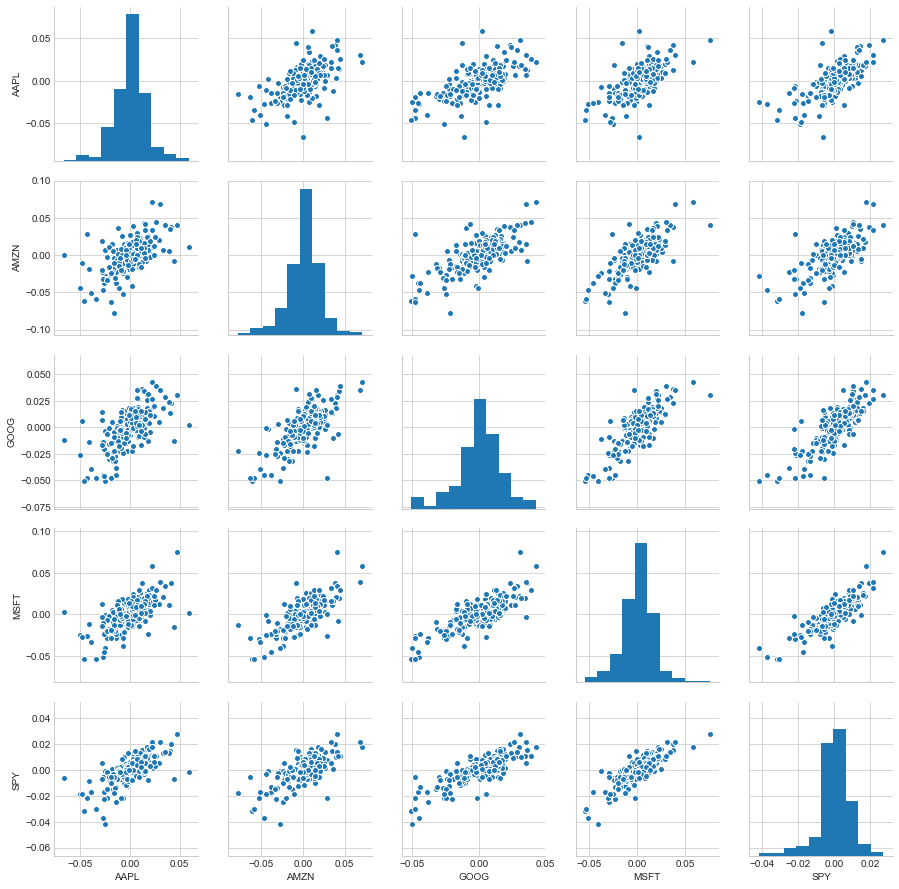

In [87]:
sns.pairplot(tech_rets.dropna())

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not use

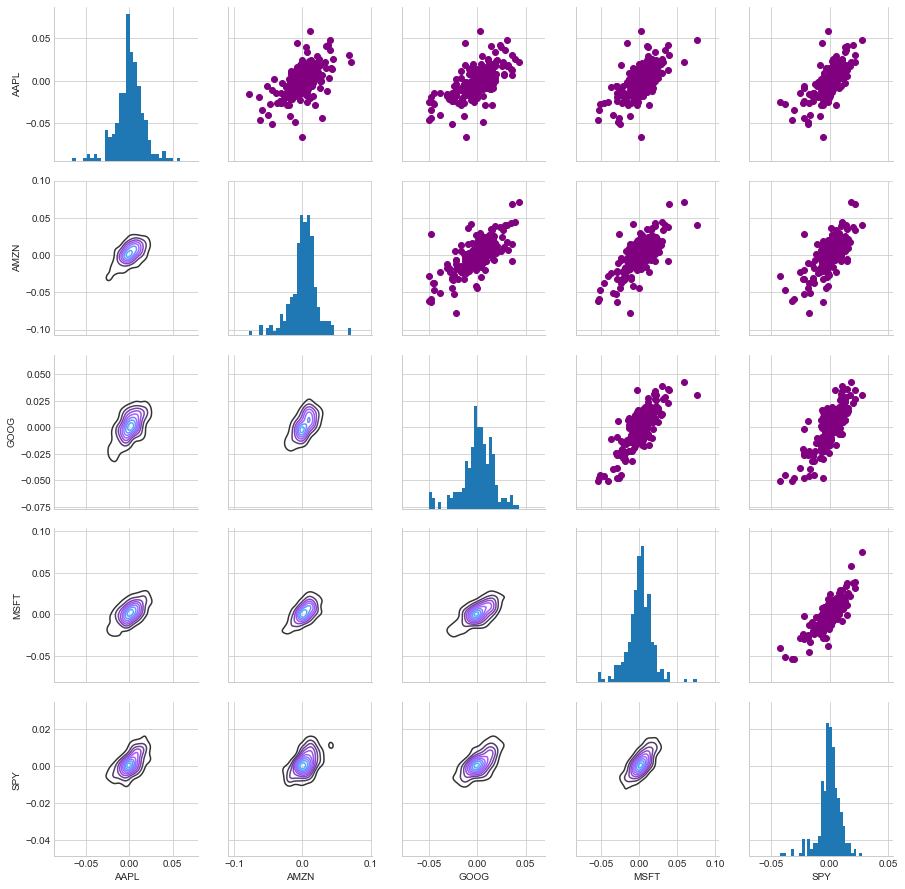

In [96]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter, color = 'purple')
returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d')
returns_fig.map_diag(plt.hist, bins = 30)

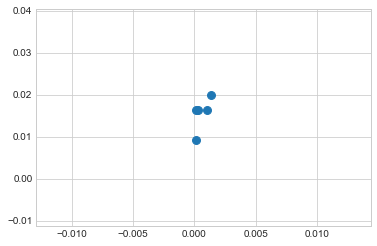

In [97]:
## Risk Analysis: 
rets = tech_rets.dropna()
area = np.pi*20
plt.scatter(rets.mean(), rets.std(), s = area)


In [ ]:
res